In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.graphics.tsaplots as st
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
Airline_df=pd.read_csv("Problem1_DataSet.csv")

In [3]:
Airline_df

,Month,"Miles, in Millions"
0,Jan-1964,7.269
1,Feb-1964,6.775
2,Mar-1964,7.819
3,Apr-1964,8.371
4,May-1964,9.069
...,...,...
79,Aug-1970,14.057
80,Sep-1970,16.234
81,Oct-1970,12.389
82,Nov-1970,11.594


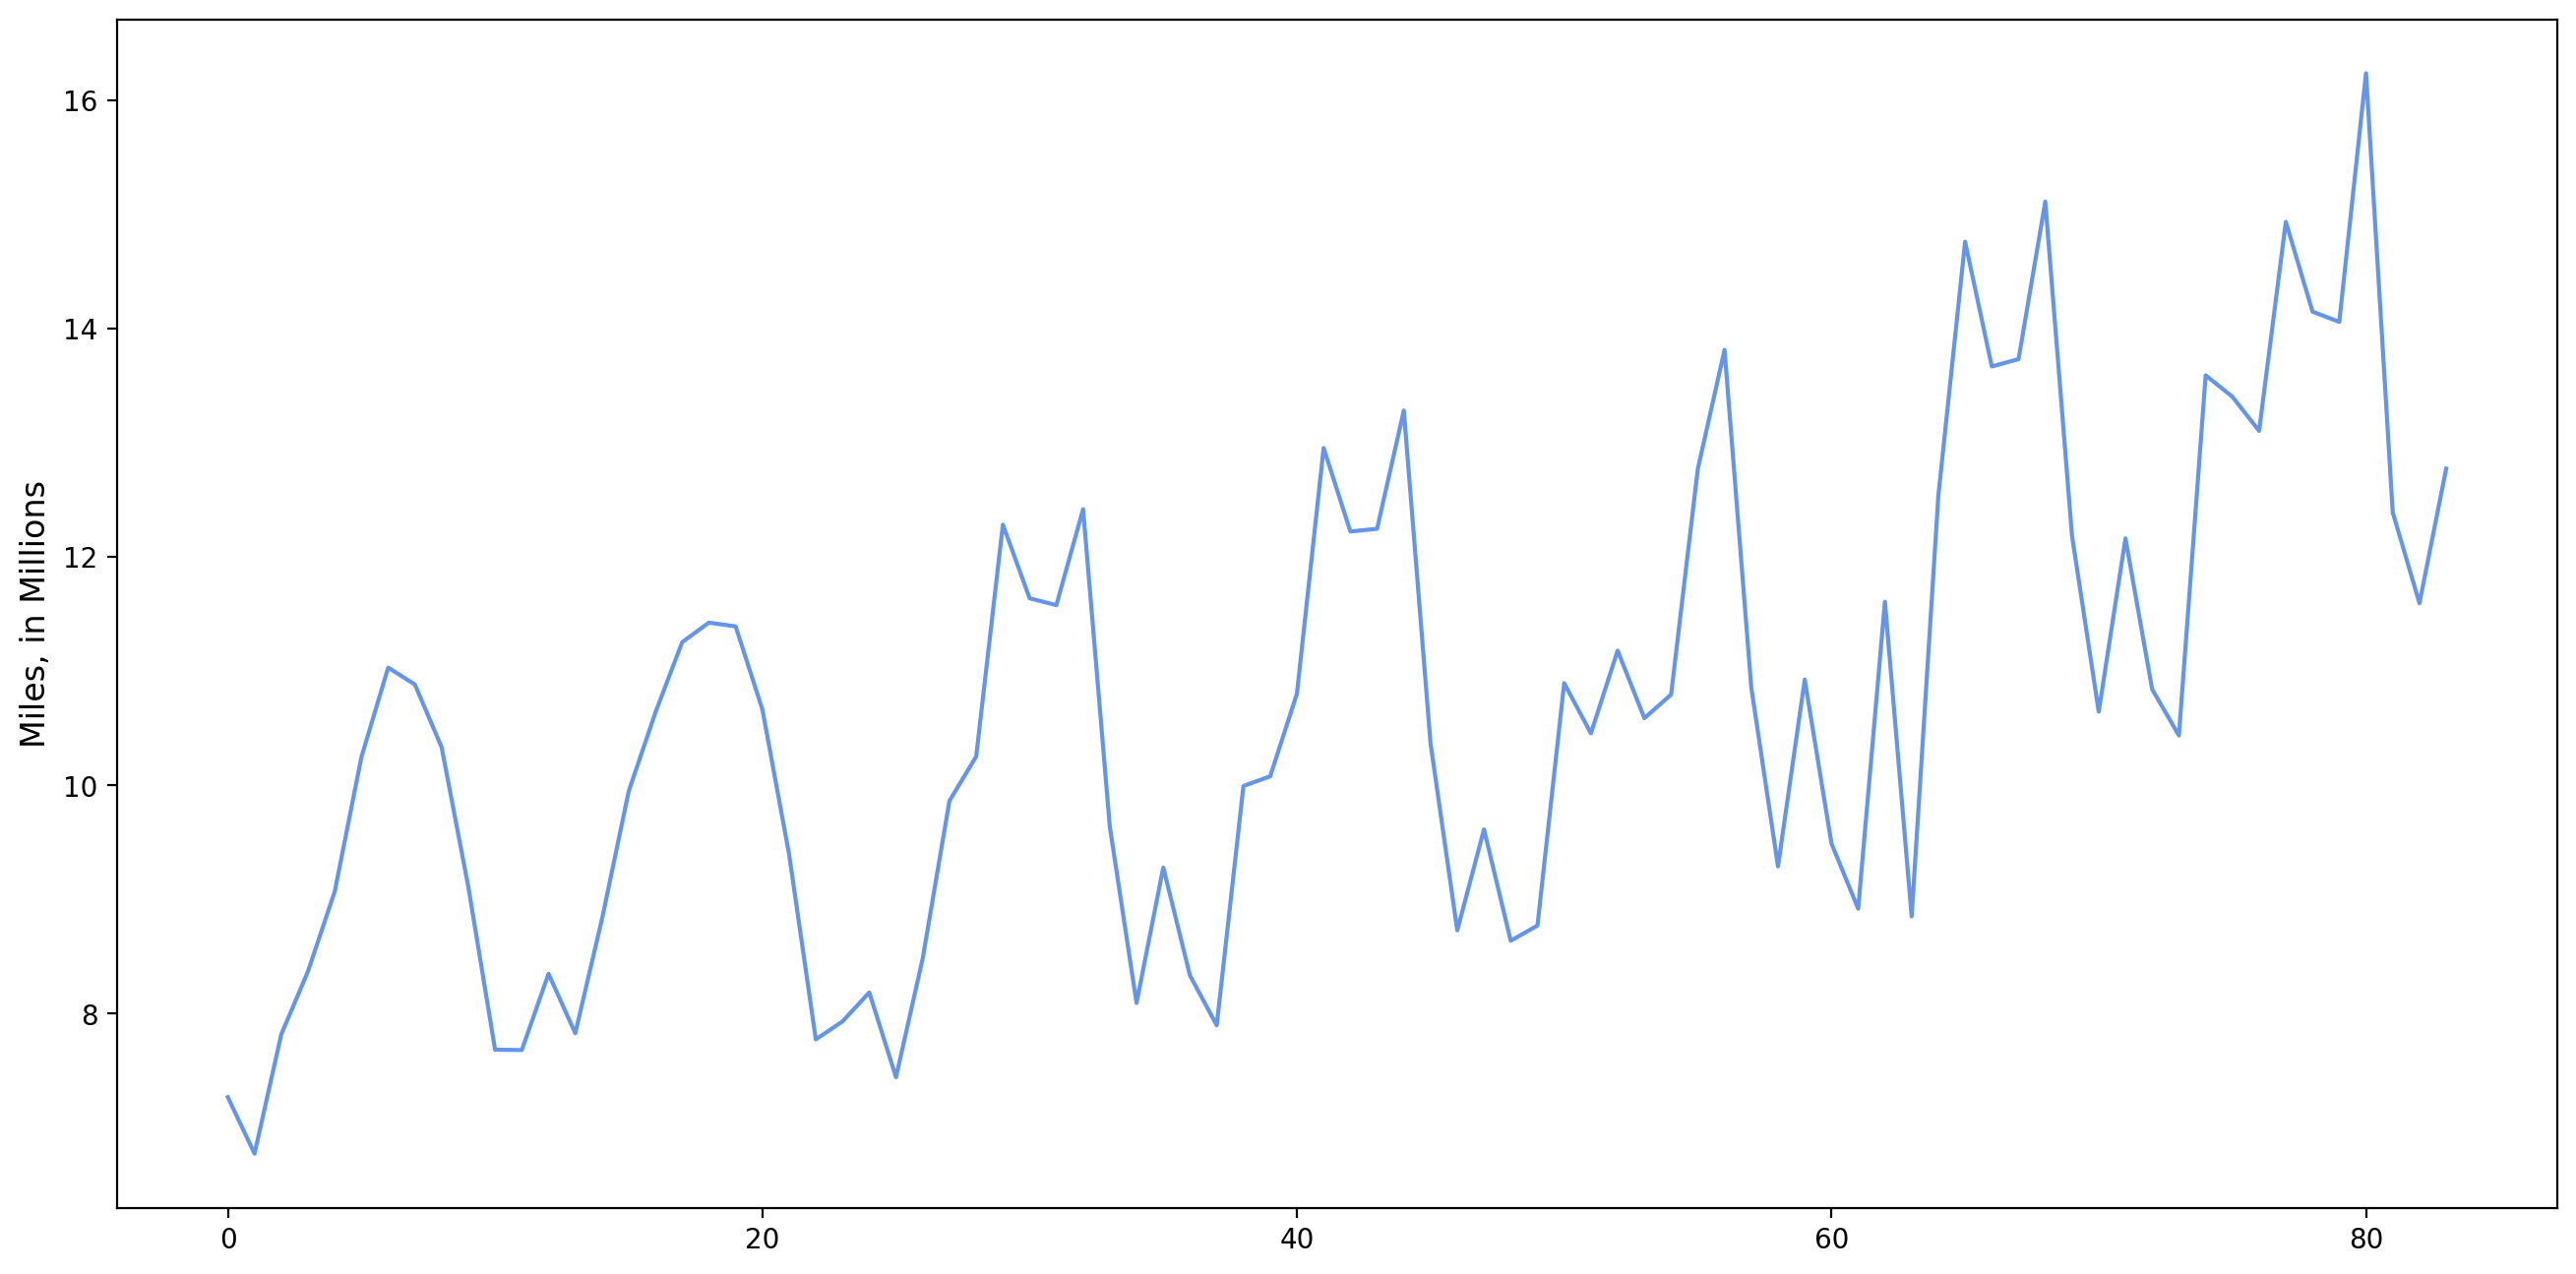

In [4]:
plt.figure(figsize=(16, 8), dpi=200)
plt.plot(Airline_df['Miles, in Millions'], color = 'cornflowerblue')
plt.ylabel('Miles, in Millions', size = 12)
plt.show()

<Figure size 3200x1600 with 0 Axes>

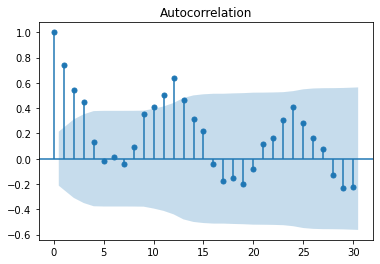

In [5]:
plt.figure(figsize=(16, 8), dpi=200)
st.plot_acf(Airline_df['Miles, in Millions'], lags=30);

From the ACF plot, we can see that the seasonal period is 12.

In [6]:
def moving_average(data,period_length):
    
    p=period_length #p is the length of our window
    k=[] #k is the list to store the mean
    t=0 #t is the total summation of the window
    
    for n in range(p-1): #for first p value, we set value of them as NaN
        k.append(np.nan)
        
    for i in range(len(data)-p+1): #for rest i value, we calculate the mean from i-p to i
        for j in range(p):
            t+=data.iloc[i+p-j-1]
        m=t/p #m is the mean value for each i
        k.append(m)
        t=0
        
    return k

In [7]:
Airline_df['ma12'] = moving_average(Airline_df['Miles, in Millions'],12)

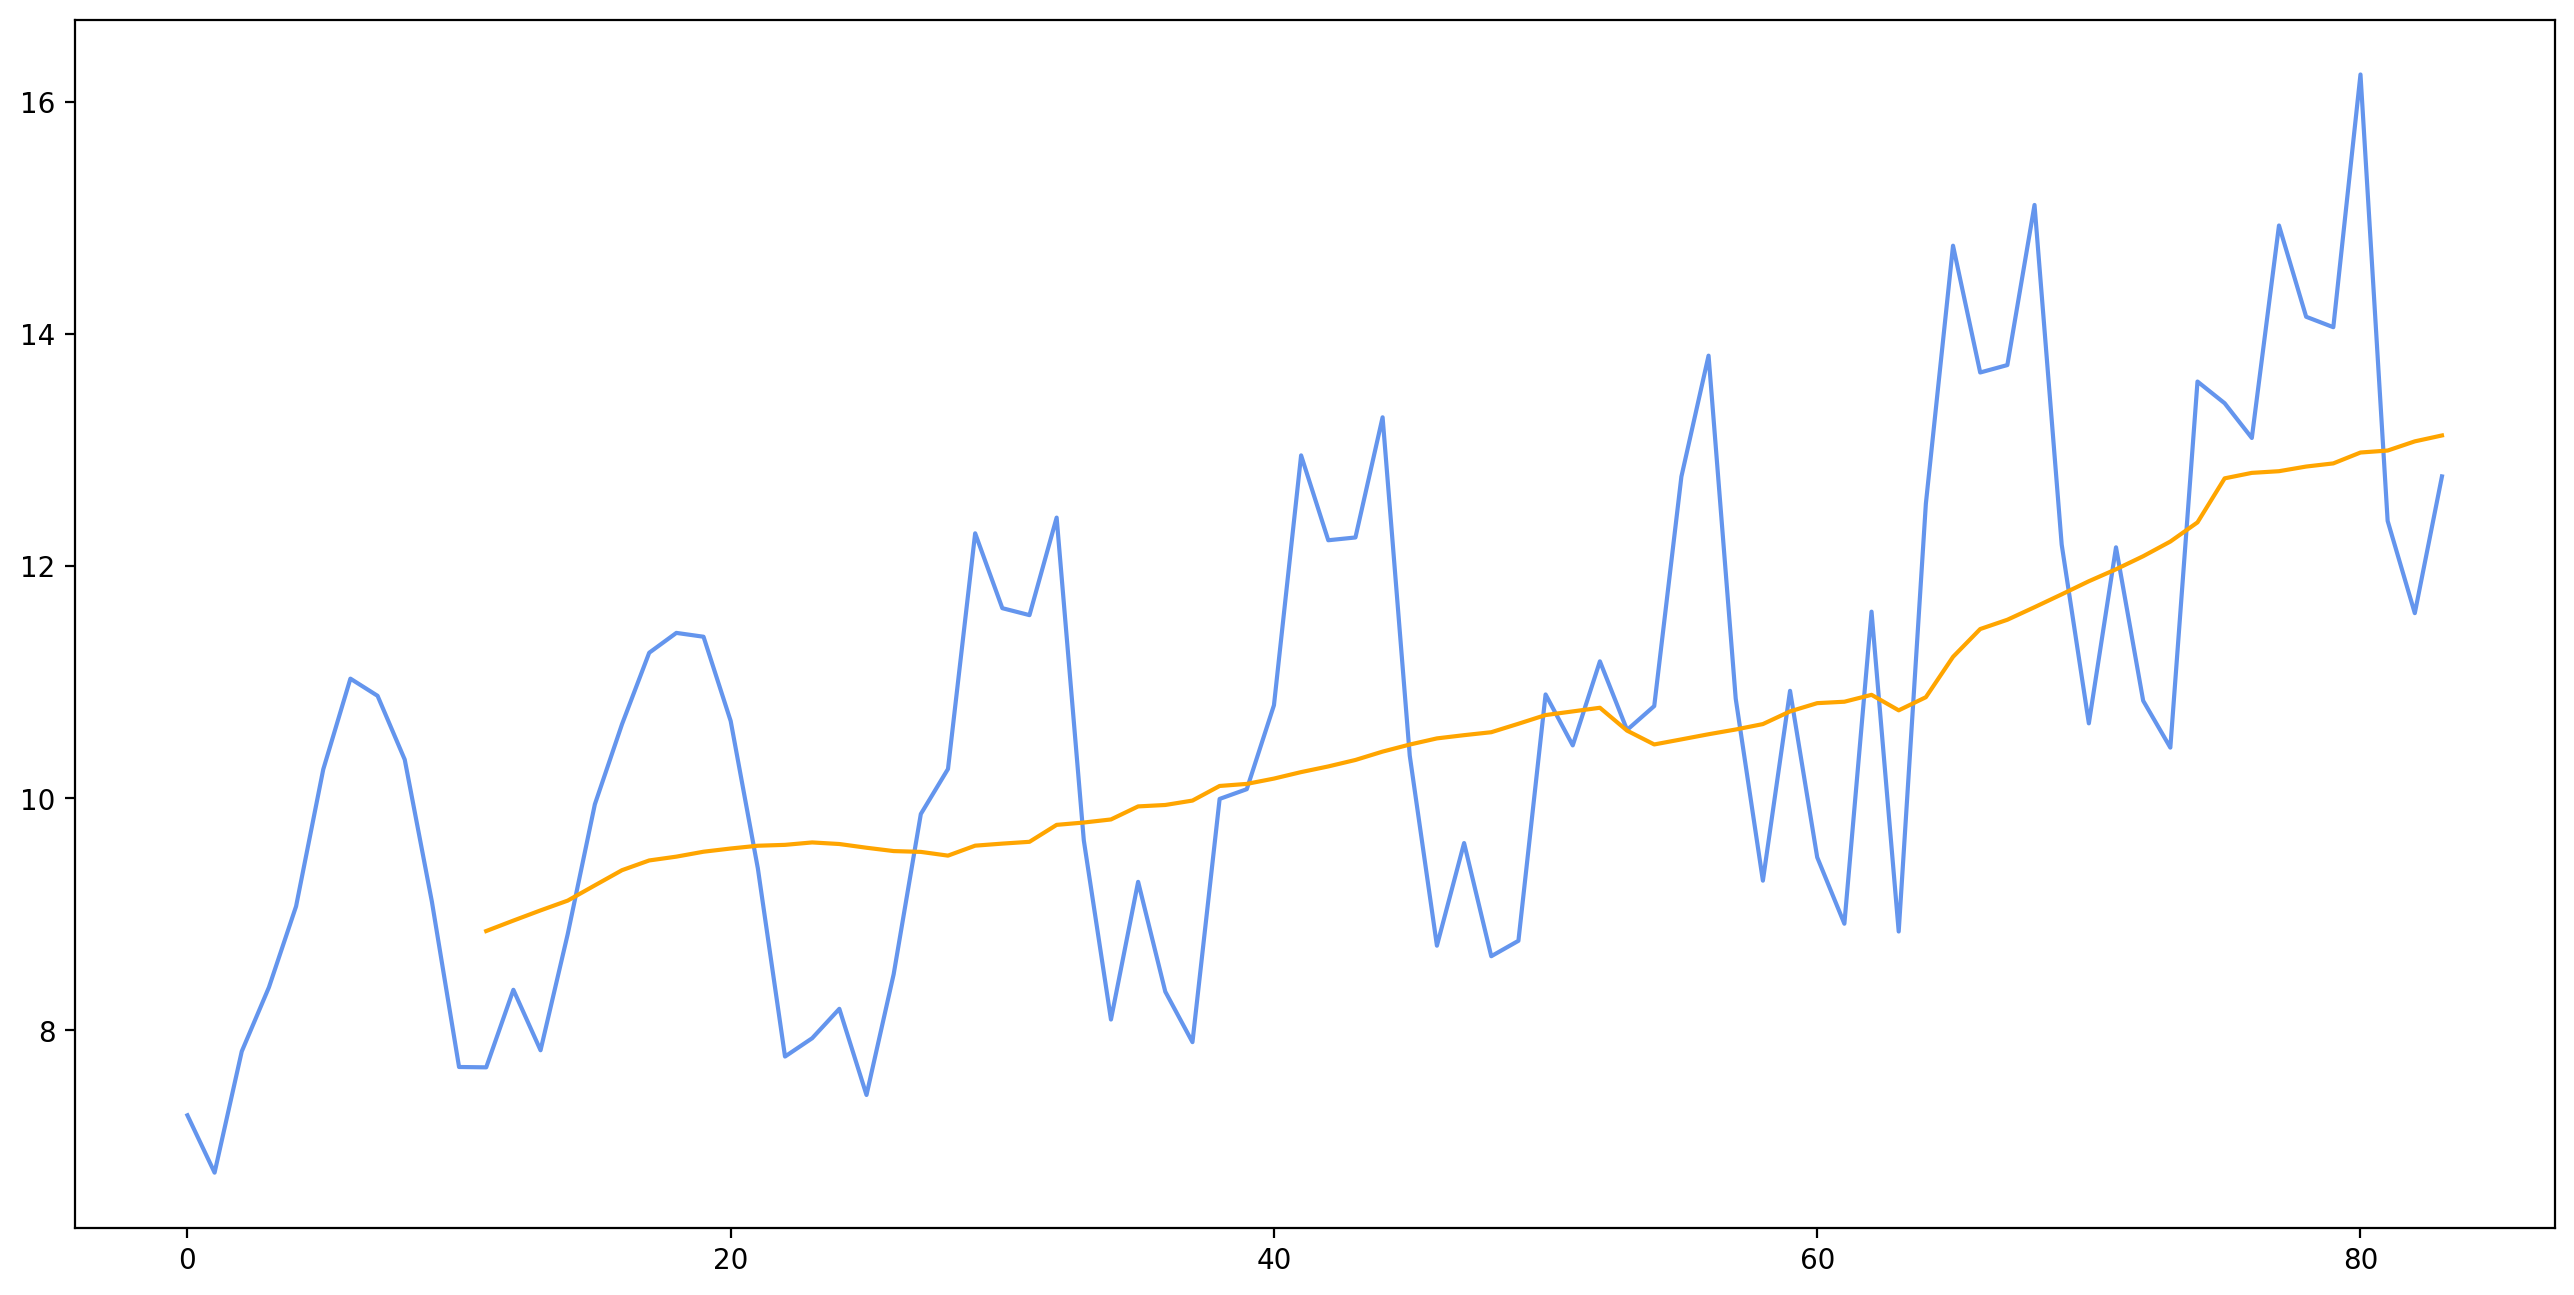

In [8]:
plt.figure(figsize=(16, 8), dpi=200)
plt.plot(Airline_df['Miles, in Millions'], color = 'cornflowerblue')
plt.plot(Airline_df['ma12'], color = 'orange')

the trend line is increasing

In [9]:
airline_diff = Airline_df['Miles, in Millions'].diff().iloc[1:]

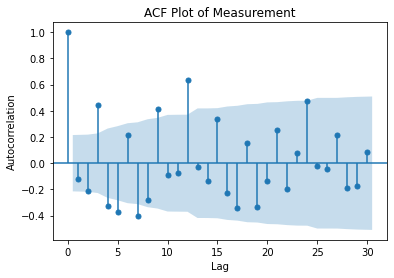

In [10]:
st.plot_acf(airline_diff, lags =30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Measurement')
plt.show()

E:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


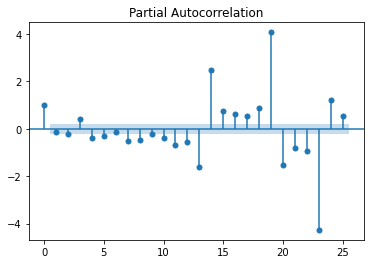

In [11]:
st.plot_pacf(airline_diff, lags = 25);

In [12]:
airline_seasonal_diff = Airline_df['Miles, in Millions'].diff(12).iloc[12:]

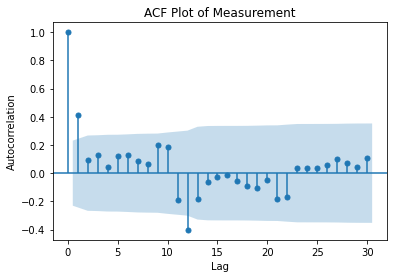

In [13]:
st.plot_acf(airline_seasonal_diff, lags =30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Measurement')
plt.show()

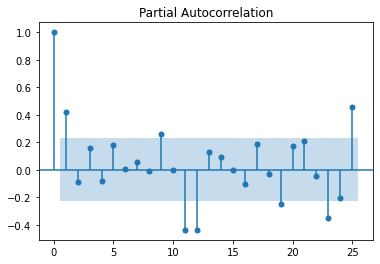

In [14]:
st.plot_pacf(airline_seasonal_diff, lags = 25);

In [15]:
airline_6year=Airline_df.head(72)

In [16]:
#set parameters to find the best sarima model

import warnings
warnings.filterwarnings("ignore")

plist=[0,1,2,3]
dlist=[1]
qlist=[0,1,2,3]
Plist=[0,1,2,3]
Dlist=[1]
Qlist=[0,1,2,3]
pdqPDQ=[]
aic=[]
bic=[]
for p in plist:
    for d in dlist:
        for q in qlist:
            for P in Plist:
                for D in Dlist:
                    for Q in Qlist:
                        try: 
                            best_model=SARIMAX(airline_6year['Miles, in Millions'], order=(p, d, q), seasonal_order=(P, D, Q, 12))
                            best_model_fit=best_model.fit(disp=False)
                            pdqPDQ.append([p,d,q,P,D,Q])
                            aic.append(best_model_fit.aic)
                            bic.append(best_model_fit.bic)
                        except:
                            continue

In [17]:
#By comparison, we find the min aic and the corrreponding parameters 
min_aic=min(aic)
min_bic=min(bic)
index_aic=aic.index(min_aic)
index_bic=bic.index(min_bic)
print('min aic is', min_aic)
print('min aic is', min_bic)
print('The best choice of parameters (p,d,q,P,D,Q) according to the minimum AIC value is', pdqPDQ[index_aic])
print('The best choice of parameters (p,d,q,P,D,Q) according to the minimum BIC value is', pdqPDQ[index_bic])

min aic is 147.2834974454961
min aic is 156.337968222718
The best choice of parameters (p,d,q,P,D,Q) according to the minimum AIC value is [2, 1, 3, 1, 1, 0]
The best choice of parameters (p,d,q,P,D,Q) according to the minimum BIC value is [0, 1, 2, 0, 1, 0]


In [18]:
best_model_air=SARIMAX(airline_6year['Miles, in Millions'], order=(2, 1, 3), seasonal_order=(1, 1, 0, 12)).fit(disp=False)

<AxesSubplot:>

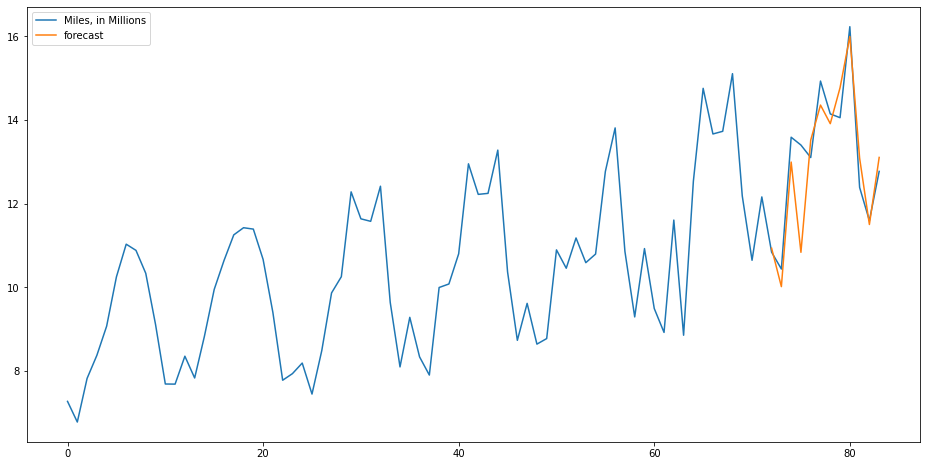

In [19]:
Airline_df['forecast']=best_model_air.forecast(12)
Airline_df['Miles, in Millions'][72:]
Airline_df[['Miles, in Millions','forecast']].plot(figsize=(16, 8))